# T2 - MC920
> Natan Beltrão da Cunha Pevidor Carvalho - 184972



## Limiarização Global

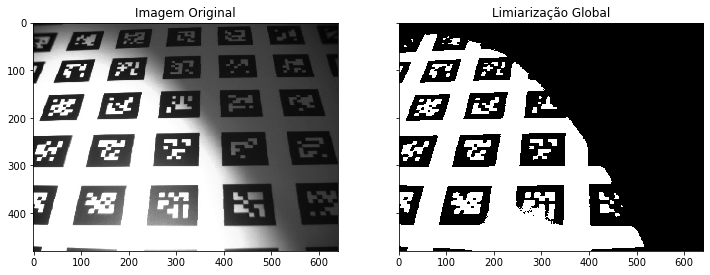

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

img = plt.imread('./images/in/fiducial.pgm') #* 255

figure, axis = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 8))
axis[0].set_title('Imagem Original')
axis[0].imshow(img, cmap='gray', vmin=0, vmax=255)

global_thresholding = np.where(img < 128, 0, 255)

axis[1].set_title('Limiarização Global')
axis[1].imshow(global_thresholding, cmap='gray', vmin=0, vmax=255)
imageio.imsave('images/out/globalthresholding.pgm', global_thresholding.astype(np.uint8))

plt.show()